# Projet Python

## 1) Import, observation et traitement de la dataset

##### Import de numpy et pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import seaborn as sns

# Pour la visualisation
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap

from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# Pour les modèles de ML/DL
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets, svm

In [2]:
import os
dossier = "DataS/"
dossier_train= dossier + "Train/"
dossier_test= dossier + "Test/"
if not os.path.exists(dossier):
    os.mkdir(dossier)

##### Import des datasets test et train

In [3]:
X_base_test=np.loadtxt(dossier_test + "X_test.txt")
y_base_test=np.loadtxt(dossier_test + "y_test.txt")
X_base_train=np.loadtxt(dossier_train + "X_train.txt")
y_base_train=np.loadtxt(dossier_train + "y_train.txt")

##### Import de la liste des id des participants selon les autres dataset dataset

In [4]:
subject_id_test = np.loadtxt(dossier_test + "subject_id_test.txt")
subject_id_train = np.loadtxt(dossier_train + "subject_id_train.txt")

##### Import de la liste des features et des activités

In [5]:
dfAct = pd.read_csv("DataS/activity_labels.txt",header=None, sep=",", encoding="utf-8")
dfFeat = pd.read_csv("DataS/features.txt", sep=",", encoding="utf-8")

In [6]:
dfFeat.to_numpy()
dfFeat.head()

,Index
0,tBodyAccMean1
1,tBodyAccMean2
2,tBodyAccMean3
3,tBodyAccSTD1
4,tBodyAccSTD2


In [7]:
dfAct.head()

,0
0,WALKING
1,WALKING_UPSTAIRS
2,WALKING_DOWNSTAIRS
3,SITTING
4,STANDING


##### Création de dataframes train et test

In [8]:
## création de Dataframe X_train/test, y_train/test et subject_id_test/train

dfX_test= pd.DataFrame(X_base_test, columns = dfFeat['Index'])
dfy_test= pd.DataFrame(y_base_test, columns = ['Activity'])
dfX_train= pd.DataFrame(X_base_train, columns = dfFeat['Index'])
dfy_train= pd.DataFrame(y_base_train, columns = ['Activity'])
dfX = pd.concat([dfX_train,dfX_test], axis=0)
dfy = pd.concat([dfy_train,dfy_test], axis=0)
dfSubId_test= pd.DataFrame(subject_id_test, columns = ['subject_id'])
dfSubId_train= pd.DataFrame(subject_id_train, columns = ['subject_id'])

In [9]:
##Création de nos dataframe train et test
dfTrain = dfX_train.join(dfy_train)
dfTrain = dfTrain.join(dfSubId_train)##
dfTest = dfX_test.join(dfy_test)
dfTest = dfTest.join(dfSubId_test)

dfTrain['Data'] = 'Train'
dfTest['Data'] = 'Test'

In [10]:
##Je garde seulement les activités simples pour les étudier, il y a trop peu de données concernant les changement d'états
for j in range(dfAct.shape[0]):
        dfTrain = dfTrain[dfTrain['Activity'].between(0, 6)]
        dfTest = dfTest[dfTest['Activity'].between(0, 6)]

In [11]:
## Ma tentative pour clarifier les activités dans ma base de données en les reliant aux strings correspondant ;)
## Clarification des activités$
#for j in range(0,dfy_test.shape[0]-1):
  #      if(dfTest.iloc[j,561] == 1):
    #        dfTest.iloc[j,561] = dfAct.iloc[0,0]
    #    if(dfTest.iloc[j,561] == 2):
    #        dfTest.iloc[j,561] = dfAct.iloc[1,0]
     #   if(dfTest.iloc[j,561] == 3):
     #       dfTest.iloc[j,561] = dfAct.iloc[2,0]
     #   if(dfTest.iloc[j,561] == 4):
     #       dfTest.iloc[j,561] = dfAct.iloc[3,0]
     #   if(dfTest.iloc[j,561] == 5):
     #       dfTest.iloc[j,561] = dfAct.iloc[4,0]
      #  if(dfTest.iloc[j,561] == 6):
     #       dfTest.iloc[j,561] = dfAct.iloc[5,0]
        

In [12]:
## Clarification des activités$
##for j in range(0,dfy_train.shape[0]-1):
  ##  for i in range(0,5):
   ##         if(dfTrain.iloc[j,561] == i+1):
     ##           dfTrain.iloc[j,561] = dfAct.iloc[i,0]

##### Visualisation 

In [13]:
dfTrain.sample(25)

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,Activity,subject_id,Data
4331,0.039887,-0.003331,-0.018664,-0.976346,-0.994677,-0.988589,-0.975565,-0.994451,-0.990284,-0.786466,...,-0.224757,-0.409107,-0.074983,-0.051357,0.405159,-0.341485,-0.636422,6.0,21.0,Train
7609,0.039863,0.019322,0.014685,-0.951990,-0.761206,-0.683637,-0.965807,-0.741058,-0.685089,-0.715246,...,-0.001667,-0.096074,0.278376,-0.330611,-0.909265,0.151983,-0.009827,5.0,30.0,Train
4766,0.076095,0.012148,-0.042501,-0.065035,-0.304592,-0.453582,-0.088207,-0.412343,-0.551318,0.253834,...,-0.449832,-0.803541,-0.568906,-0.000213,-0.768717,0.239345,-0.053133,1.0,22.0,Train
845,0.065167,-0.029595,-0.020077,-0.367565,-0.265674,-0.683183,-0.376380,-0.330814,-0.716653,-0.162141,...,-0.495300,0.666469,-0.309238,0.036063,-0.962064,0.116384,0.044734,1.0,5.0,Train
2037,0.038315,-0.007153,-0.017461,-0.998492,-0.990127,-0.996532,-0.998232,-0.989725,-0.997163,-0.803672,...,-0.004028,-0.041457,-0.404221,-0.406989,-0.798190,0.190936,-0.083860,5.0,11.0,Train
2976,0.009619,0.031966,-0.020586,-0.174111,-0.139296,-0.744617,-0.225846,-0.183536,-0.769279,0.091710,...,0.571632,-0.805709,0.836991,-0.793970,-0.796076,0.233815,-0.015918,1.0,15.0,Train
6610,0.037666,-0.011734,-0.026918,-0.992067,-0.952259,-0.972614,-0.993000,-0.965522,-0.974993,-0.797733,...,-0.007115,-0.192956,0.492186,0.469814,-0.795411,0.238948,0.008300,5.0,28.0,Train
79,-0.207973,-0.603742,0.282750,-0.609882,-0.087289,-0.406381,-0.652153,-0.224619,-0.562756,-0.731318,...,0.124640,0.428454,-0.014570,-0.174725,0.638966,-0.372953,-0.626811,6.0,1.0,Train
5445,0.039012,0.000002,-0.022777,-0.996347,-0.995536,-0.992425,-0.997117,-0.995677,-0.993590,-0.799533,...,0.049296,0.086862,-0.095332,-0.461162,-0.668745,-0.057642,-0.150946,4.0,25.0,Train
2825,0.073471,-0.039706,-0.032585,0.048198,-0.287737,-0.685244,-0.041749,-0.273658,-0.728043,0.245889,...,-0.602632,0.001541,-0.912122,0.606389,-0.709891,0.297000,-0.003999,2.0,15.0,Train


In [14]:
dfTest.head()

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,Activity,subject_id,Data
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074,5.0,2.0,Test
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825,5.0,2.0,Test
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302,5.0,2.0,Test
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079,5.0,2.0,Test
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849,5.0,2.0,Test


##### Observation des dataframes X_test/train et y_train/test

In [15]:
dfX_train.shape, dfX_test.shape, dfy_train.shape, dfy_test.shape

((7767, 561), (3162, 561), (7767, 1), (3162, 1))

Ratio du split

In [16]:
[tuple_[0]/dfX.shape[0] for tuple_ in (dfX_train.shape, dfX_test.shape, dfy_train.shape, dfy_test.shape)]

[0.7106780126269558,
 0.2893219873730442,
 0.7106780126269558,
 0.2893219873730442]

## 2) Data-Visualisation 

##### Concaténation de Train et test pour réaliser quelques analyses

In [17]:
dfAll = pd.concat([dfTrain,dfTest], axis=0).reset_index(drop=True)
dfAll['subject_id'] = dfAll['subject_id'].astype(str)
dfAll.sample(25)

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,Activity,subject_id,Data
916,0.039925,-0.002709,-0.021447,-0.994759,-0.992003,-0.984382,-0.994862,-0.992139,-0.985235,-0.795858,...,0.128616,-0.636743,0.111738,0.664034,0.583958,-0.812385,-0.174776,6.0,5.0,Train
439,0.038633,0.012819,-0.044146,-0.398658,-0.395395,-0.548957,-0.457285,-0.434659,-0.621958,0.192007,...,0.029744,-0.507900,0.923227,-0.053382,-0.731202,0.260881,0.116176,1.0,3.0,Train
10289,0.040509,-0.009737,-0.015524,-0.993106,-0.974441,-0.980641,-0.993648,-0.979082,-0.985233,-0.796733,...,-0.032784,-0.163137,-0.142116,0.051789,-0.857614,-0.001115,-0.001389,4.0,24.0,Test
9929,0.039626,-0.011863,-0.000646,-0.992714,-0.976536,-0.962392,-0.993303,-0.978598,-0.963043,-0.795792,...,0.013835,0.289731,-0.056308,0.009088,-0.931555,0.123983,0.066404,4.0,20.0,Test
3256,0.035720,-0.009938,-0.026817,-0.992420,-0.964217,-0.974101,-0.992305,-0.961927,-0.976600,-0.800139,...,0.001550,-0.063198,-0.498705,0.552507,-0.671099,0.218190,0.222959,5.0,17.0,Train
2872,-0.011426,0.023545,-0.048653,0.349724,-0.134335,-0.503575,0.287977,-0.311861,-0.630986,0.595226,...,0.635485,0.589133,0.707313,0.318287,-0.876625,0.183490,0.019199,3.0,15.0,Train
4522,0.040456,0.028822,-0.039410,-0.034688,-0.271353,-0.481141,-0.053926,-0.363606,-0.581783,0.106078,...,0.135547,0.398195,-0.656884,0.271211,-0.760064,0.252705,-0.037923,1.0,22.0,Train
2811,0.027055,0.004687,-0.007935,-0.966650,-0.969004,-0.957098,-0.970682,-0.971167,-0.960472,-0.800928,...,0.033309,0.026427,-0.452567,0.339799,0.304399,-0.664623,0.302875,6.0,15.0,Train
1794,0.040616,-0.003711,-0.013732,-0.996478,-0.963639,-0.986573,-0.996636,-0.967306,-0.988276,-0.800724,...,0.008136,-0.244821,0.979075,0.818149,-0.715268,0.159148,0.218641,5.0,8.0,Train
10312,0.034716,-0.004450,-0.015867,-0.981908,-0.992049,-0.991333,-0.982680,-0.992386,-0.992003,-0.783777,...,-0.036828,-0.314756,-0.105913,0.347819,0.444813,-0.501588,-0.480958,6.0,24.0,Test


In [18]:
# Pour savoir s'il y a des valeurs null dans notre Dataset
print('Null Values In DataFrame: {}\n'.format(dfAll.isna().sum().sum()))
dfAll.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10411 entries, 0 to 10410
Columns: 564 entries, tBodyAccMean1 to Data
dtypes: float64(562), object(2)
memory usage: 44.8+ MB


In [19]:
dfAllTemp = dfAll

activity = dfAllTemp.pop('Activity')

Data = dfAllTemp.pop('Data')
dfData = dfAll.join(activity)
dfData = dfAll.join(Data)

In [20]:
activity_counts = activity.value_counts()

sns.set(style="whitegrid")
activity.sample(10)

8395     6.0
2846     2.0
2558     5.0
7215     3.0
4025     4.0
195      4.0
10391    2.0
1756     2.0
7224     2.0
8105     6.0
Name: Activity, dtype: float64

### Affichage de plots représantant les activités et le déplacement des participants à l'aide Tnse

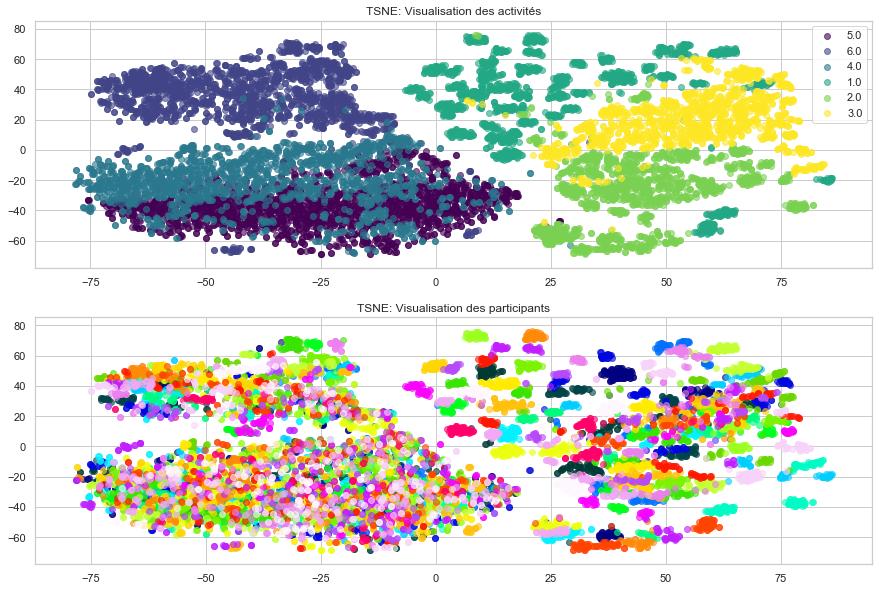

In [23]:
# Creation des datasets
base_data = dfAllTemp.copy()
subject_data = base_data.pop('subject_id')
# Nous scalons les datas
scl = StandardScaler()
base_data = scl.fit_transform(base_data)

# Reduction de la dimension de ma base
pca = PCA(n_components=0.9, random_state=3)
base_data = pca.fit_transform(base_data)


# Transformation de la bse grâce à TSNE qui nous permet d'ajuster les dimensions pour avoir une meilleure vue d'ensemble
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(base_data)


# Création des graphes avec une modification de leurs tailles
fig, array = plt.subplots(2, 1, figsize=(15,10))

### Nuages de point représentant la répartition des activites 
# Obtenir des couleurs différentes pour chaque activités
n = activity.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Affichage des activités
for i, group in enumerate(activity_counts.index):
    # Utilisation du mask  pour séparer les sets
    mask = (activity==group).values
    array[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.6, label=group)
array[0].set_title('TSNE: Visualisation des activités')
array[0].legend()

### Affichage des participants marchant
# Obtenir des couleurs différents pour chaque individus
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Affichage de chaque participant
for i, group in enumerate(subject_data.unique()):
    #Mask pour la même chose
    mask = (subject_data==group).values
    array[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.6, label=group)

array[1].set_title('TSNE: Visualisation des participants')
plt.show()

On peut voir dans le premier visuel la répartition des activités.

Dans le deuxième, on observe la marche des différents participants. On peut y voir des différences

### Heat map global montrant des corrélations

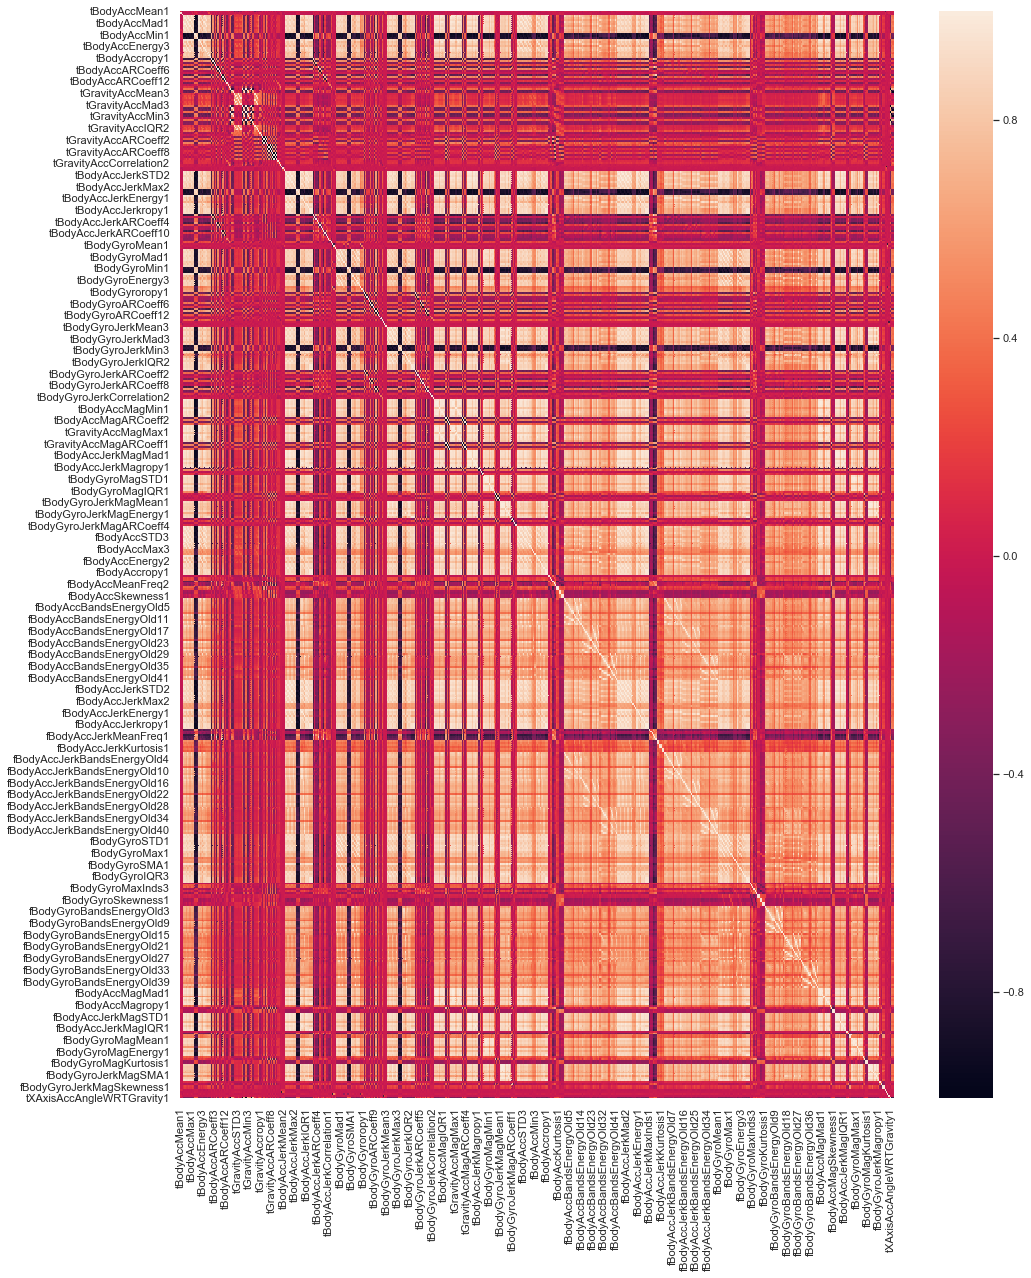

In [24]:
plt.figure(figsize=(16,20))
sns.heatmap(dfAll.corr())

In [25]:
dfData.head()

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,subject_id,Data
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1.0,Train
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1.0,Train
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1.0,Train
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1.0,Train
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1.0,Train


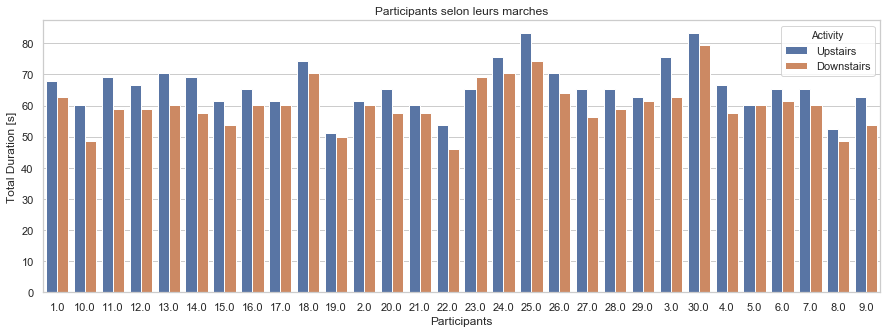

In [26]:
# Groupement de la donnée et calcul du temps de marche 
mask = activity.isin(['2', '3'])
duration_df = (dfData[mask].groupby([activity[mask], 'subject_id'])['Data'].count() * 1.28)

# Création de la donnée et de son plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({2:'Upstairs', 3:'Downstairs'})

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject_id', y='Data', hue='Activity')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

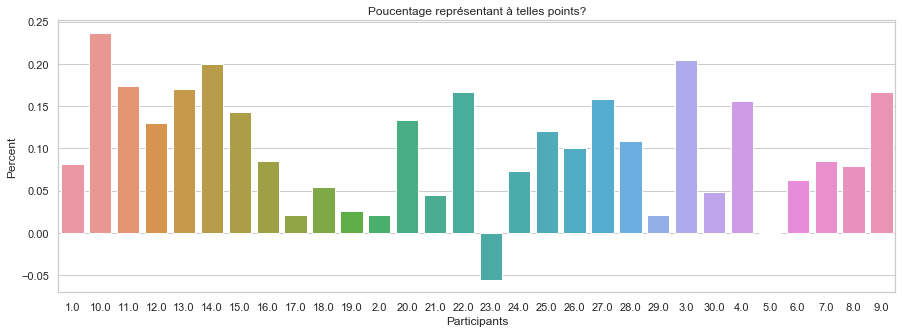

In [27]:
# Création de la données et du plot
plt.figure(figsize=(15,5))
plot_data = ((duration_df.loc[2] / duration_df.loc[3]) -1).sort_values(ascending=False)
sns.barplot(x=plot_data.index, y=plot_data)
plt.xlabel('Participants')
plt.ylabel('Percent')
plt.show()

## 3) Application de modèles

In [28]:
#### Import des méthodes dont j'ai le besoin

In [36]:
import timeit

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
##import tensorflow as ts
##from tensorflow.keras.models import Sequential, Model
##from tensorflow.keras.layers import Dense, ELU, Input, Dropout

#### J'ai effectué mon propre split pour l'étude.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dfAllTemp, activity, random_state=3)
dfX_train = pd.DataFrame(X_train)
dfy_train = pd.DataFrame(y_train)
dfy_test = pd.DataFrame(y_test)
dfX_test = pd.DataFrame(X_test)

dfData['subject_id'] = '#' + dfData['subject_id']

In [38]:
features = dfX_train
label = dfy_train['Activity']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
print(New_features.shape)

/Users/abroutin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(7808, 88)


In [40]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)

/Users/abroutin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
##Utilisation de 3 modèles différents : Arbres de décision, Random Forest et Gradient Boosting
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=200)]

### Arbre de décision

In [42]:
test_features= dfX_test
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(dfX_train,dfy_train.values.ravel())
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(dfy_test['Activity'],pred))

### Random Forest

In [43]:
test_features= model.transform(dfX_test)
Time_2=[]
Model_2=[]
Out_Accuracy_2=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(dfy_test['Activity'],pred))

### Gradiant boosting

In [44]:
test_features= model_2.transform(dfX_test)

Time_3=[]
Model_3=[]
Out_Accuracy_3=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(dfy_test['Activity'],pred))

#### Réalisation d'un graphique mettant en avant les différents résultats obtenus

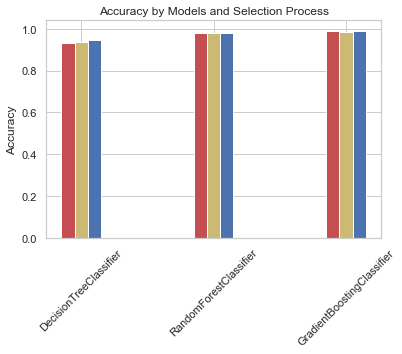

In [45]:
# création d'index [0,1,2] pour placer mes valeurs dans l'histogrammes
ind =  np.arange(3)   
# tailles des barres
width = 0.1       
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

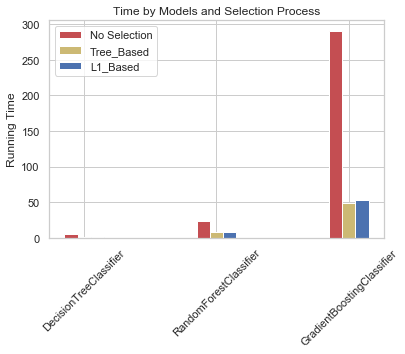

In [46]:
ind =  np.arange(3) 
width = 0.1    
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))

plt.show()

In [47]:
dfData.head(10)

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,subject_id,Data
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,##1.0,Train
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,##1.0,Train
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,##1.0,Train
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,##1.0,Train
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,##1.0,Train
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,##1.0,Train
6,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,-0.800606,...,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,##1.0,Train
7,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,-0.800606,...,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,##1.0,Train
8,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,-0.800245,...,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,##1.0,Train
9,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,-0.799717,...,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,##1.0,Train


NameError: name 'single_person' is not defined

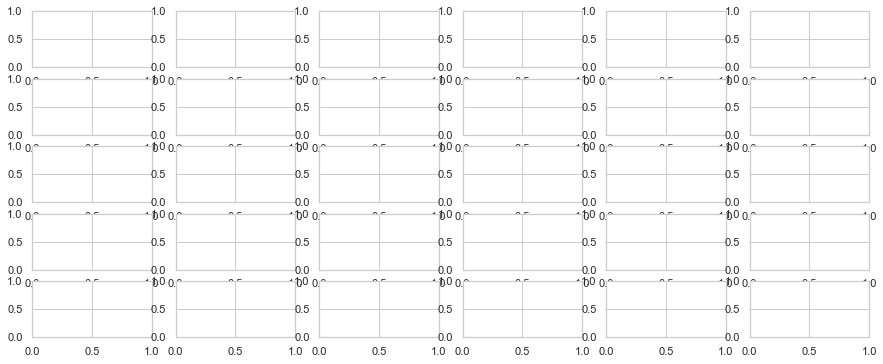

In [48]:
#Tentative d'afficher les deplacements de toutes les individus

fig, axarr = plt.subplots(5, 6, figsize=(15,6))

for person in range(0, 30):
    onePerson = dfData[(activity==1) & (dfData['subject_id']=='{}'.format(person+1))].drop(['subject_id', 'Data'], axis=1)
    scl = StandardScaler()
    data = scl.fit_transform(single_person)
    pca = PCA(n_components=0.9, random_state=3)
    data = pca.fit_transform(data)
    tsne = TSNE(random_state=3)
    tsne_transformed = tsne.fit_transform(data)
    
    axarr[person//6][person%6].plot(tsne_transformed[:,0], tsne_transformed[:,1], '.-')
    axarr[person//6][person%6].set_title('Participant #{}'.format(person+1))
    axarr[person//6][person%6].axis('off')
    
plt.tight_layout()
plt.show()